# 10章高性能Python
## 西野泰平

### 10.1ループ

##### Pythonのループ問題を扱います。課題は単純です。「多数」の乱数を作り、平均値を返す関数を書きます。間題の実行時間をマジック関数％timeと％timeitで計測します。

#### 10.1.1Python

##### ピュアPythonの速くない関数の例を挙げます。average_py()です。

In [1]:
import random

In [2]:
#sの変数値初期化(2行目)
#区間(0,1)の一様分布に従う乱数値をsに追加(4行目)
#平均値(mean)を返す(5行目)
def average_py(n): 
    s=0 
    for i in range(n): 
        s += random.random()
        return s / n

In [3]:
#ループの反復回数を定義
n = 10000000

In [4]:
#関数1回の実行時間
%time average_py(n)

CPU times: total: 0 ns
Wall time: 0 ns


3.230330570205398e-08

In [5]:
#関数実行時間を複数回測定した、より信頼できる推定
%timeit average_py(n)

553 ns ± 28.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
#関数の代わりにリスト内包表記を使う
%time sum([random.random() for_ in range(n)])/n

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

#### 10.1.2 NumPy

##### NumPyの強みはベクトル化機能です。ループがPythonコードから消えます。ループは一段深い、NumPyの最適化コンパイルルーチンで行われます。関数average_np()はこれを使います。

In [7]:
import numpy as np

In [8]:
#「全部一度に」乱数を生成（ループなし）(2行目)
#平均値(mean)を返す(3行目)
def average_np(n):
    s = np.random.random(n)
    return s.mean()

In [9]:
%time average_np(n)

CPU times: total: 62.5 ms
Wall time: 124 ms


0.50005779777431

In [10]:
%timeit average_np(n)

120 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
s = np.random.random(n) 
s.nbytes

80000000

##### 速度向上はかなりのもので、1桁速い10倍です。しかし、大幅なメモリ使用量という犠牲を払わねばなりません。これは、コンパイル時のデータ事前割り当てにより、NumPyが高速になっているからです。結果的に、この方式では「ストリーム」データを扱えません。このメモリ使用量の増加は、アルゴリズムや問題によっては耐え難い大きさになります。

#### 10.1.3 Numba

##### Numba(https://numba.pydata.org/)はLLVMを使い、ピュアPythonコードを動的コンバイルするパッケージです。この例のような単純なアプリケーションでは驚くほど簡単に動的コンパイルした関数average_nb()をPythonから直接呼び出すことができます。

In [12]:
import numba

In [13]:
#Numba関数を作成
average_nb = numba.jit(average_py)


C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\990461221.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  average_nb = numba.jit(average_py)


In [14]:
#コンパイルは実行時に行われ、オーバヘッドがある
%time average_nb(n)

CPU times: total: 188 ms
Wall time: 1.71 s


8.581715889702656e-08

In [15]:
#2回目の実行（同じ入カデータ型）から実行が速くなる
%time average_nb(n)

CPU times: total: 0 ns
Wall time: 0 ns


9.147713656950597e-08

In [16]:
%timeit average_nb(n)

187 ns ± 6.79 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


##### ピュアPythonとNumbaの組み合わせはNumPy版より速く、しかも元のループベース実装のメモリ効率を維持します。Numbaでは、このような単純な場合にはプログラミングオーバヘッドがないのも明らかです。

#### 10.1.4 Cython

##### Cython(https:// cython.org)はPythonコードを静的コンパイルします。しかし、大幅な速度向上のためには一般にコード変更が必要なためNumbaのように愉単ではありません。まず、変数に静的型宜言をするCython関数average_cy1()を定義します。

In [17]:
%load_ext Cython

ModuleNotFoundError: No module named 'Cython'

In [ ]:
#Cythonでrandomモジュールをインポート(2行目)
#変数n,i, sに静的型宣言を追加(3行目,4行目,5行目)
%%cython -a
import random
def average_cy1(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += random.random()
    return s / n

SyntaxError: invalid syntax (4162159616.py, line 5)

In [ ]:
%time average_cy1(n)

NameError: name 'average_cy1' is not defined

In [ ]:
%timeit average_cy1(n)

NameError: name 'average_cy1' is not defined

##### 速度向上は観測されますが、例えばNumPy版にはるかにおよびません。Numba版に勝つにはCythonの最適化がさらに必要です。

In [ ]:
#Cから乱数発生器インポート(2行目)
#乱数のスケーリング定数値インポート(3,4行目)
#スケーリング後、区間(o,1)一様分布に従う乱数を追加(8行目)
%%cython
from libc.stdlib cimport rand
cdef extern from'limits. h':
    int INT_MAX
cdef int i
cdef float rn
for i in range(5): 
rn = rand() / INT_ MAX
print(rn)

SyntaxError: invalid syntax (1552704185.py, line 5)

In [ ]:
%%cython -a
from libc. stdlib cimport rand
cdef extern from'limits. h:
    int INT_MAX
cdef int i
cdef float s = 0
for i in range(n):
    s += rand() / INT_MAX
return s / n

UsageError: Cell magic `%%cython` not found.


In [ ]:
%time average_cy2(n)

NameError: name 'average_cy2' is not defined

In [ ]:
%timeit average_cy2(n)

NameError: name 'average_cy2' is not defined

##### このCython最適化版average_cy2()はNumba版より少し速いですが、手間も増えました。Numpy版と比べてCythonは元のループベース実装のメモリ効率を維持します。

### 10.2 アルゴリズム

##### 前節の性能向上技法を数学でよく知られた問題とアルゴリズムに適用します。これらのアルゴリズムは性能ベンチマークとしてよく使われます。

#### 10.2.1 素数

##### 素数は純粋数学だけでなく暗号のようなコンピュータサイエンスの応用分野でも重要な役割を果たします。大きな素数は稀で発見困難ですが、数が素数でないことの証明は簡単です。必要なのは1より大きな因数で割れることだけです。

##### 10.2.1.1 Python

##### 数が素数か調べるアルゴリズムの実装は多数あります。次のPythonコードはアルゴリズムの観点では最適ではありませんが効率的です。しかし、大きな素数p2では実行時間が長くなります。


In [19]:
#数が偶数ならFalseをすぐ返す(2行目)
#ループを3で開始、Iの平方根＋1までステップサイズ2(3行目)
#因数が見つかると関数はFalseを返す(4行目)
#因数が見つからないとTrueを返す(5行目)
def is_prime(I):
    if I % 2 == 0: return False 
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0:return False
        return True
                   

In [20]:
#比較的小さな非素数と素数
n = int(1e8 + 3)
n

100000003

In [21]:
%time is_prime(n)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [22]:
#比較的小さな非素数と素数
pl= int(1e8 + 7) 
pl

100000007

In [23]:
%time is_prime(pl)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [24]:
p2 = 100109100129162907

In [25]:
p2.bit_length()

57

In [26]:
%time is_prime(p2)

CPU times: total: 0 ns
Wall time: 0 ns


True

##### 10.2.1.2 Numba

##### 関数is_prime(）のアルゴリズムのループ構造はNumba動的コンパイルに向いています。オーバヘッドは最小でかなりの速度向上です。

In [27]:
is_prime_nb = numba.jit(is_prime) 

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2295254139.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  is_prime_nb = numba.jit(is_prime)


In [28]:
#is_prime_nb()の最初の呼び出しにはコンパイルオーバヘッドがある
%time is_prime_nb(n)

CPU times: total: 62.5 ms
Wall time: 117 ms


True

In [29]:
#2回目の呼び出しから速度向上が見える
%time is_prime_nb(n)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [30]:
%time is_prime_nb(pl)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [31]:
#大きな素数の速度向上は約1桁
%time is_prime_nb(p2)

CPU times: total: 0 ns
Wall time: 0 ns


True

##### 10.2.1.3 Cython

##### Cythonの適用も簡単です。型宣言のないCython版でも大幅に速度が向上します。

In [32]:
%%cython
def is_prime_cy1(I): 
if I% 2 == 0: return False 
for i in range(3, int(I ** 0.5) + 1, 2): 
if I% i == 0: return False 
return True

UsageError: Cell magic `%%cython` not found.


In [33]:
%timeit is_prime(p1)

NameError: name 'p1' is not defined

In [34]:
%timeit is_prime_cy1(p1)

NameError: name 'is_prime_cy1' is not defined

##### しかし、静的型宣言をしないと本当の速度改善は得られません。このCython版はNumba版よりわずかに速くなります。

In [35]:
%%cython
def is_prime_cy2(long I):
    cdef long i
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
        return True

UsageError: Cell magic `%%cython` not found.


In [36]:
%timeit is_prime_cy2(p1)

NameError: name 'is_prime_cy2' is not defined

In [37]:
%time is_prime_nb(p2)

CPU times: total: 0 ns
Wall time: 0 ns


True

In [38]:
%time is_prime_cy2(p2)

NameError: name 'is_prime_cy2' is not defined

##### 10.2.1.4 マルチプロセス

##### これまでは、逐次コード実行を最適化してきました。特に素数では、複数の数を同時にチェックする必要も、もしかしたら、あるかもしれません。そのためにmultiprocessingモジュール(https:// docs. python.org/3/library/multiprocessing.html)がコード実行のさらなる速度向上に役立ちます。複数のPythonプロセスで並列実行できます。この単純な場合は、簡単に使えます。まず、mp.Poolオブジェクトに、複数のプロセスを割り当てます。次に、チェックする素数に実行する関数をマップします。

In [39]:
import multiprocessing as mp

In [40]:
#mp.Poolオブジェクトを複数プロセスでインスタンス化
pool= mp.Pool(processes=4)

In [41]:
#関数を素数のlistオブジェクトにマップ
%time pool.map(is_prime, 10 * [pi])

NameError: name 'pi' is not defined

In [42]:
%time pool.map(is_prime_nb, 10 * [p2])

CPU times: total: 0 ns
Wall time: 1.08 s


[True, True, True, True, True, True, True, True, True, True]

In [43]:
%time pool.map(is_prime_cy2, 10 * [p2])

NameError: name 'is_prime_cy2' is not defined

##### 大幅な速度向上が観測されました。Python関数is_prime()は大きな素数p2で20秒を超えます。is_prime_nb()とis_prime_cy2()関数はともに4プロセス並列実行で素数p2の10倍の数で10秒以下です。

#### 10.2.2 フィボナッチ数

##### フィボナッチ数／数列は単純なアルゴリズムで計算できます。初期値は2つの1(1, 1)です。3番目以降は、先行する2つのフィボナッチ数の和が次のフィボナッチ数になります。1,1, 2, 3, 5, 8, 13, 21,… です。本節では2つの実装、再帰と反復を分析します。

##### 10.2.2.1 再帰アルゴリズム

##### 通常のPythonのループと同様、通常の再帰関数実装はPythonでは比較的遅いことがわかっています。最終結果が得られるまで、関数が何度も自分自身を呼び出す可能性があります。関数fib_rec_py1(）はそのような実装です。この場合Numbaは実行速度向上に役立ちません。しかし、Cythonを使い、静的型宜言をするだけで、大幅に速度が向上します。

In [44]:
def fib_rec_py1(n): 
    if n<2:
        return n 
    else: 
        return fib_rec_py1(n -1) + fib_rec_py1(n-2)

In [45]:
%time fib_rec_py1(35)

CPU times: total: 1.16 s
Wall time: 2.62 s


9227465

In [46]:
fib_rec_nb = numba.jit(fib_rec_py1)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\1560077512.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  fib_rec_nb = numba.jit(fib_rec_py1)


In [47]:
%time fib_rec_nb(35)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\3380155756.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fib_rec_py1" failed type inference due to: Untyped global name 'fib_rec_py1': Cannot determine Numba type of <class 'function'>

File "..\..\..\AppData\Local\Temp\ipykernel_9856\3380155756.py", line 5:
<source missing, REPL/exec in use?>

  def fib_rec_py1(n):
c:\Users\iikkdn\anaconda3\Lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "fib_rec_py1" was compiled in object mode without forceobj=True.

File "..\..\..\AppData\Local\Temp\ipykernel_9856\3380155756.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
c:\Users\iikkdn\anaconda3\Lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected. This is deprecated behaviour that wi

CPU times: total: 1.14 s
Wall time: 2.68 s


9227465

In [48]:
%%cython 
def fib_rec_cy(int n): 
    if n<2:
    return n 
    else: 
        return fib_rec_cy(n -1) + fib_rec_cy(n-2)

UsageError: Cell magic `%%cython` not found.


In [49]:
%time fib_rec_cy1(35)

NameError: name 'fib_rec_cy1' is not defined

##### 再帰アルゴリズムには、中間結果をキャッシュせず再計算してしまうという大きな問題があります。この問題を避けるには、デコレータを使い、中間結果をキャッシュします。実行速度は複数桁向上します。

In [50]:
from functools import lru_cache as cache

In [51]:
#中間結果をキャッシュ
@cache(maxsize=None)
def fib_rec_py2(n): 
    if n<2:
        return n 
    else: 
        return fib_rec_py2(n -1) + fib_rec_py2(n-2)

In [52]:
%time fib_rec_py2(35)

CPU times: total: 0 ns
Wall time: 0 ns


9227465

In [53]:
%time fib_rec_py2(80)

CPU times: total: 0 ns
Wall time: 0 ns


23416728348467685

##### 10.2.2.2 反復アルゴリズム

##### n番目のフィボナッチ数を計算するアルゴリズムは再帰的に実装できますが、必ずしも必要というわけではありません。次のコードはピュアPythonで再帰実装のキャッシュ版より高速な反復実装です。これはNumbaで速度は向上しますが、Cythonの方が高速です。


In [54]:
def fib_it_py(n): 
    x, y = 0, 1 
for i in range(1, n + 1):
    x, y = y, x + y 
return x

NameError: name 'y' is not defined

In [55]:
%time fib_it_py(80)

CPU times: total: 0 ns
Wall time: 0 ns


In [56]:
fib_it_nb = numba.jit(fib_it_py)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2328495738.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  fib_it_nb = numba.jit(fib_it_py)


In [57]:
%time fib_it_nb(80)

CPU times: total: 31.2 ms
Wall time: 47.7 ms


In [58]:
%time fib_it_nb(80)

CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
%%cython 
def fib_it_cy1(int n): 
cdef long i 
cdef long x = o, y = 1 
for i in range(1, n + 1): 
X, y = y, X + y 
return x

UsageError: Cell magic `%%cython` not found.


In [60]:
%time fib_it_cy1(80)

NameError: name 'fib_it_cy1' is not defined

##### いずれも速度が向上しました。なぜ、例えば150番目ではなく、80番目のフィボナッチ数を計算するのか不思議に思う人もいるでしょう。間題はデータ型です。Pythonは基本的に任意の大きな数(「3.1基本データ型」を参照)を扱えますが、これは一般にコンパイル言語では成り立ちません。Cythonでは可能ですが、しかし、64ビットのdoubleオブジェクトより大きな数を扱うことができる特別なデータ型を使います。

In [61]:
#Python版は高速で正確。(2,3行目)
%%time
fn = fib_rec_py2(150) 
print(fn)

UsageError: Line magic function `%%time` not found.


In [62]:
#結果の整数はビット長103(>64) 
fn.bit_length()

NameError: name 'fn' is not defined

In [63]:
#Numba/Cython版はより高速だが不正確(2,3行目)
%%time
fn = fib_it_nb(150)
print(fn)

UsageError: Line magic function `%%time` not found.


In [64]:
#64ビットintオプジェクト制約によるオーバフローの被害を受ける
fn.bit_length()

NameError: name 'fn' is not defined

In [65]:
%%time
fn = fib_it_cy1(150)
print(fn)

NameError: name 'fib_it_cy1' is not defined

In [66]:
fn.bit_length()

NameError: name 'fn' is not defined

In [67]:
#特別な128ビットintオブジェクト型をインポートして使用(3,5,6行目)
%%cython 
cdef extern from*: 
ctypedef int int128'__ int128_t'
def fib_it_cy2(int n):
    cdef int128 i
    cdef int128 x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
        return x

SyntaxError: invalid syntax (2913742344.py, line 3)

In [68]:
%%time
fn = fib_it_cy2(150)
print(fn)

NameError: name 'fib_it_cy2' is not defined

In [69]:
fn.bit_length()

NameError: name 'fn' is not defined

#### 10.2.3 円周率

##### 本節で分析する最後のアルゴリズムは円周率(π)の詳しい数値を計算するモンテカルロシミュレーションに基づいたアルゴリズムです。このアルゴリズムは円の面積AがA=πr^2であるという事実に基づいています。したがってπ＝A/r^2。半径r=1の単位円ではπ＝A。アルコリズムはx,y∈[-1, 1]の座標値(x,y)のランダムな点によるシミュレーションです。原点が中心の長さ2の辺の正方形の領域は面積4です。原点が中心の単位円領域は正方形領域の一部です。この単位円領域と正方形領域の面積の比をモンテカルロシミュレーションです推定します。正力形内の全点を数え、円内の全点を数え、円内の点の個数を正方形内の個数で割ります。次に例を示します（図10-1を参照）。

In [70]:
import random 
import numpy as np 
from pylab import mpl, plt 
plt.style.use('seaborn') 
mpl.rcParams['font.family'] ='serif' 
%matplotlib inline

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\781767035.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [71]:
rn =[(random.random()* 2 -1, random.random() * 2 -1) 
for _ in range(500)] 

In [72]:
rn = np.array(rn) 
rn[: 5]

array([[ 0.62070553,  0.88028381],
       [ 0.29596155,  0.48842835],
       [-0.8091155 ,  0.03899253],
       [ 0.12169421,  0.97664196],
       [-0.57339667, -0.76637623]])

(-1.1, 1.1)

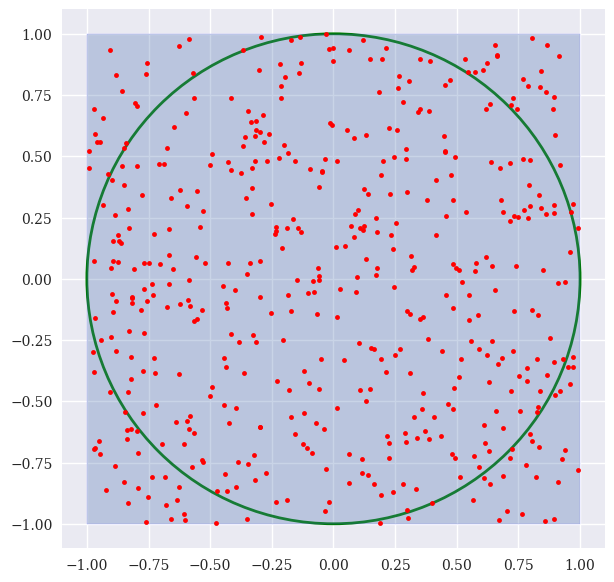

In [73]:
#図10-1
#単位円を描く(3,4,6行目)
#辺長2の正方形を描く(5,7行目)
#一様分布に従う乱数点を描く(8行目)
fig= plt.figure(figsize=(7, 7)) 
ax= fig.add_subplot(1, 1, 1)
circ = plt.Circle ((0, 0), radius=1, edgecolor='g', lw=2.0, 
                   facecolor='None')
box= plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1],'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

##### アルゴリズムのNumPy実装は簡潔ですがメモリを消費します。この引数値での全実行時間は約1秒です。

In [74]:
n = int(1e7)

In [75]:
%time rn = np.random.random((n, 2)) * 2 -1

CPU times: total: 219 ms
Wall time: 372 ms


In [76]:
rn.nbytes

160000000

In [77]:
#原点からの点の距離（ユークリッド・ノルム）
%time distance= np.sqrt((rn ** 2).sum(axis=1))
distance[:8].round(3)

CPU times: total: 188 ms
Wall time: 271 ms


array([0.559, 0.317, 0.995, 0.317, 0.431, 1.222, 0.859, 0.835])

In [78]:
#円の点の全点に対する割合
%time frac = (distance <= 1.0).sum()/len(distance)

CPU times: total: 15.6 ms
Wall time: 21.8 ms


In [79]:
#4という正方形領域に対する円領域、よってnの推定
pi_mcs = frac * 4
pi_mcs

3.1420748

##### mcs_pi_py()はforループを使い、モンテカルロシミュレーションをメモリ効率的に実装したPython関数です。この場合、乱数は変わらないことに注意してください。この実行時間はNumPy版より長いですが、この場合Numbaでコンパイルした版はNumPy版より高速です。

In [80]:
def mcs_pi_py(n): 
    circle = 0 
    for_ in range(n):
    x,y = random.random(), random.random() 
    if (x ** 2 + y ** 2) ** 0.5 <= 1: 
        circle+= 1 
        return (4 * circle) / n

SyntaxError: invalid syntax (2704863287.py, line 3)

In [81]:
%time mcs_pi_py(n)

NameError: name 'mcs_pi_py' is not defined

In [82]:
mcs_pi_nb = numba.jit(mcs_pi_py)

NameError: name 'mcs_pi_py' is not defined

In [83]:
%time mcs_pi_nb(n)

NameError: name 'mcs_pi_nb' is not defined

In [84]:
%time mcs_pi_nb(n)

NameError: name 'mcs_pi_nb' is not defined

##### 静的刑宣言だけのCython版はPython版よりそんなに高速ではありません。しかし、Cの乱数生成機能を使えばさらにかなり速度が向上します。

In [85]:
%%cython -a 
import random 
def mcs_pi_cy1(int n): 
cdef int i, circle = 0 
cdef float x, y 
for i in range(n): 
x, y = random.random(), random.random() 
if (x ** 2 + y ** 2) ** 0.5く=1: 
circle += 1 
return (4 *circle)/ n

UsageError: Cell magic `%%cython` not found.


In [86]:
%time mcs_pi_cy1(n)

NameError: name 'mcs_pi_cy1' is not defined

In [87]:
%%cython -a 
from libc. stdlib cimport rand 
cdef extern from'limits. h': 
int INT_MAX 
def mcs_pi_cy2(int n): 
cdef inti, circle= 0 
cdef float x, y 
for i in range(n): 
x, y = rand() / INT_MAX, rand() / INT_MAX 
if (x ** 2 + y ** 2) ** 0.5 <= 1: 
circle += 1 
return (4 * circle) / n

UsageError: Cell magic `%%cython` not found.


In [88]:
%time mcs_pi_cy2(n)

NameError: name 'mcs_pi_cy2' is not defined

### 10.3 二項ツリー

##### オプション評価の一般的な数値計算力法がCox,Ross,and Rubinstein (1979)による二項オプション価格付けモデルです。このメソッドは資産の将来の変動の可能性を（再結合）木で表します。このモデルでは、Black-Scholes-Merton(1973)の場合と同様に、指数または株式というリスク資産、債券という無リスク資産があるとします。オプションの現在から満期までの時間は一般に長さΔtの等分区間に分割されます。時刻sの指数の値Ssが与えられたとき、t=s+Δtの指数の値はSt=Ss*mで与えられ、このときmは{u,d}から0<d<exp(rΔt)<u=exp(σ√Δt)およびu=1/dという条件でランダムに選ばれ、rは定数で無リスク短期金利です。

#### 10.3.1 Python

##### 次のコードは固定数値パラメータモデルで再結合木を作るPython実装です。

In [89]:
import math 

In [90]:
#リスク資産初期値(1行目)
#二項ツリーシミュレーション対象期間(2行目)
#定数短期金利(3行目)
#定数ボラティリティ(4行目)
S0 = 36.
T = 1.0
r = 0.06
sigma = 0.2

In [91]:
#時間間隔の長さ(2行目)
#上下動要因(3,4行目)
def simulate_tree(M):
    dt = T / M 
    u = math.exp(sigma * math.sqrt(dt)) 
    d = 1 / u 
    S = np.zeros((M + 1, M + 1)) 
    S[0, 0] = S0 
    z = 1 
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t - 1] * u 
            S[i + 1, t] = S[i, t - 1] * d 
            z += 1 
            return S

##### 典型的なツリープロットと異なり、上方移動がndarrayでは横移動として表されます。それが結果としてndarrayのサイズを大幅に小さくします。

In [92]:
np.set_printoptions(formatter={'float': lambda x:'%6.2f'% x})

In [93]:
#4時間間隔の木
simulate_tree(4)

array([[ 36.00,  39.79,   0.00,   0.00,   0.00],
       [  0.00,  32.57,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00]])

In [94]:
#500時間間隔の木
%time simulate_tree(500)

CPU times: total: 0 ns
Wall time: 0 ns


array([[ 36.00,  36.32,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,  35.68,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00]])

#### 10.3.2 NumPy

##### 少し工夫が必要ですが、NumPyでは二項ツリーを完全ベクトル化コードで作れます。

In [95]:
M = 4

In [96]:
#グロス上昇のndarrayオブジェクト(2行目)
up= np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [97]:
#グロス下降のndarrayオプジェクト(1行目)
down = up.T * 2
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [98]:
#ネット上昇（ポジティブ）／下降（ネガティブ）動向のndarrayオブジェクト
up - down


array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [99]:
dt = T / M

In [100]:
#4時間間隔（値は右上三角）の木
S0* np.exp(sigma * math.sqrt(dt) * (up -down))

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

##### NumPyでは、コードが少し簡潔になります。しかし、それよりも重要なのは、NumPyベクトル化によって、メモリ使用呈を増やすことなくl桁の速度向上が達成できたということです。

In [101]:
def simulate_tree_np(M): 
    dt = T / M 
    up= np.arange(M + 1) 
    up= np.resize(up, (M + 1, M + 1)) 
    down = up. transpose() * 2 
    S =S0* np.exp(sigma * math.sqrt(dt) * (up -down)) 
    return S

In [102]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [103]:
%time simulate_tree_np(500) 

CPU times: total: 0 ns
Wall time: 8.58 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

#### 10.3.3 Numba

##### この金融アルゴリズムはNumba動的コンパイルの最適化に向いているはずです。実際、NumPy版の1桁に並ぶ速度向上が観測されます。Numba版はPython（とハイブリッド）版より1桁高速です。

In [104]:
simulate_tree_nb = numba.jit(simulate_tree)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2556252535.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  simulate_tree_nb = numba.jit(simulate_tree)


In [105]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,   0.00,   0.00,   0.00],
       [  0.00,  32.57,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00,   0.00,   0.00]])

In [106]:
%time simulate_tree_nb(500)

CPU times: total: 0 ns
Wall time: 997 µs


array([[ 36.00,  36.32,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,  35.68,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.00]])

In [107]:
%timeit simulate_tree_nb(500)

528 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### 10.3.4 Cython

##### これまでと同様、Cythonでは大幅な速度向上のためにコード修正が必要です。次の版は主として静的型宣言とインポートを使い、通常のPythonインポートと関数よりも速度が向上しています。

In [108]:
#ndarrayオブジェクトのC配列宣言が性能向上の決め手(12行目)
%%cython -a 
import numpy as np 
cimport cython 
from libc.math cimport exp, sqrt 
cdef float S0= 36. 
cdef float T = 1.0
cdef float r = 0.06 
cdef float sigma= 0.2 
def simulate_tree_cy(int M): 
cdef int z, t, i 
cdef float dt, u, d 
cdef float[:, :] S = np.zeros((M + 1, M + 1), dtype=np. float32)
dt = T / M 
u = exp(sigma * sqrt(dt)) 
d = 1/u 
s[0,0] = S0 
Z = 1 
fort in range(1, M + 1): 
for i in range(z): 
S[i, t] = S[i, t-1] *u
S[i + 1, t] = S[i, t-1] * d
z += 1
return np.asarray(S)

SyntaxError: invalid syntax (74243966.py, line 4)

##### Cython版は、Numba版より実行時間をさらに30％短縮しています。

In [109]:
simulate_tree_cy(4)

NameError: name 'simulate_tree_cy' is not defined

In [110]:
%time simulate_tree_cy(500)

NameError: name 'simulate_tree_cy' is not defined

In [111]:
%timeit S = simulate_tree_cy(500)

NameError: name 'simulate_tree_cy' is not defined

### 10.4 モンテカルロシミュレーション

##### モンテカルロシミュレーションは金融工学に不可欠な数値計算手法です。コンピュータの登場以前から使われていました。銀行などの金融機関が価格決定やリスク管理のために使っています。数値計算手法としては、ファイナンスではおそらく最も柔軟で強力です。しかし、最も計算能力を必要とします。それが理由でPythonは、少なくとも実用性の面では、モンテカルロシミュレーションを使ったアルゴリズムを実装するのに適したプログラミング言語として長らくみなされなかったのです。
##### 本節では、単純だがいまだに広く使われている、株価や指数の変動をモデル化する確率過程の幾何的ブラウン運動のモンテカルロシミュレーションを分析します。とりわけBlack-Scholes-Merton (1973) のオプション価格決定理論がこれを利用しています。前提となる評価オプションの原資産は式10-1に示す確率微分方程式(SDE)に従います。Stは時刻tの原資産の価格、rは無リスク短期金利の定数、σは定数ボラティリティ、Ztがブラウン運動です。

##### 式10-1ブラック・ショールズ・マートン確率微分方程式（幾何的ブラウン運動）
##### dSt = rStdt+σStdZt 
##### この確率微分方程式は等時間間隔で離散化でき、オイラー法の式10-2でシミュレーションできます。この場合zは標準正規分布に従う乱数です。M時間間隔では、時間間隔長がΔt≡T/M、Tがシミュレーション対象時間（例えば評価オプションの満期日まで）となります。

##### 式10-2ブラック・ショールズ・マートン微分方程式（オイラー法）
##### St=S(t-Δt)exp((r-σ^2/2)Δt＋σ√(Δt)z)
##### ヨーロピアンコールオプションのモンテカルロ評価は式10-3で求めることができます。ST(i)はi=1,2,…，Iのすべてのシミュレーション経路数Iに対する満期日Tでのi番目の原資産のシミュレーション価格です。

##### 式10-3ヨーロピアンコールオプションのモンテカルロ評価
C0 = exp(-rt)*(1/I)Σmax(ST(i)-K,0)

#### 10.4.1 Python

##### Pythonハイブリッド版の式10-2によるモンテカルロシミュレーション実装がmcs_simulation_py()です。ハイブリッドなのはPythonのループがndarrayオブジェクトによるからです。既に述べたように、Numba動的コンパイルに適しています。前と同じく、この実行時間がベンチマークです。シミュレーションでヨーロピアンプットオプションを評価します。

In [112]:
#離散化の時間間隔
#シミュレーション経路数
M = 100
I= 50000

In [113]:
#ベクトル化ステップで生成する乱数(6行目)
#オイラー法によるシミュレーションを実装する入れ子ループ(7~10行目)
def mcs_simulation_py(p): 
    M, I= p 
    dt = T / M 
    S = np.zeros((M + 1, I)) 
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * math.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rn[t, i])
            return S

In [114]:
%time S = mcs_simulation_py((M, I))

CPU times: total: 93.8 ms
Wall time: 172 ms


In [115]:
#シミュレーションによる平均期末値
S[-1].mean()

0.0

In [116]:
#満期価格の理論期待値
S0 * math.exp(r * T)

38.22611567563295

In [117]:
#ヨーロピアンプットオプションの権利行使価格
K = 40.

In [118]:
#オプションのモンテカルロ評価値
C0= math.exp(-r * T) * np.maximum(K -S[-1], 0).mean()

In [119]:
C0 #

37.670581343369946

##### 図10-2はシミュレーション期間終了時（ヨーロピアンプットオプション満期日）のシミュレーション値のヒストグラムです。(後でコード打つ！)

#### 10.4.2 NumPy

##### NumPy版のmcs_simulation_np()もあまり違いません。時間間隔でループするPythonのループがまだ1つ残っています。他の次元は全経路のベクトル化コードで扱います。最初の版より約20倍速いです。

In [120]:
#時間間隔でループ(7行目)
#全経路一度に処理のベクトル化NumPyコードのオイラー法(8行目)
def mcs_simulation_np(p): 
    M, I = p 
    dt =T / M 
    S = np.zeros((M + 1, I)) 
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rn[t])
        return S


In [121]:
%time S = mcs_simulation_np((M, I))

CPU times: total: 78.1 ms
Wall time: 168 ms


In [122]:
S[-1].mean()

0.0

In [123]:
%timeit S = mcs_simulation_np((M, I))

153 ms ± 3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 10.4.3 Numba

##### Numbaがこのようなアルゴリズムに簡単に使うことができ、大幅な性能向上になることに、もはや驚かないはずです。Numba版のmcs_simulation_nb(）はNumPy版より少し速いです。

In [124]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2190167922.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  mcs_simulation_nb = numba.jit(mcs_simulation_py)


In [125]:
#コンパイル時オーバヘッドのある最初の呼び出し
%time S = mcs_simulation_nb((M, I))

CPU times: total: 344 ms
Wall time: 938 ms


In [126]:
#ォーパヘッドのない2回目の呼び出し
%time S = mcs_simulation_nb((M, I))

CPU times: total: 31.2 ms
Wall time: 177 ms


In [127]:
S[-1].mean()

0.0

In [128]:
C0= math.exp(-r * T) * np.maximum(K-S[-1], 0).mean()
C0

37.670581343369946

In [129]:
%timeit S = mcs_simulation_nb((M, I))

170 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 10.4.4 Cython

##### Cythonではコード変更の手間が大きいにも関わらず、それほど速度が向上しません。Cython版のmcs_simulation_cy(）は、NumPyやNumba版より少し遅いようです。シミュレーション結果をndarrayオブジェクトに変換する時間が必要なのが理由です。

In [130]:
%%cython 
import numpy as np 
cimport numpy as np 
cimport cython 
from libc.math cimport exp, sqrt 
cdef float S0= 36. 
cdef float T = 1.0 
cdef float r = 0.06 
cdef float sigma= 0.2 
@cython.boundscheck(False) 
@cython.wraparound(False) 
def mcs_simulation_cy(p): 
    cdef int M, I 
    M, I= p 
    cdef int t, i 
    cdef float dt =TIM 
    cdef double[:, :] S = np.zeros((M + 1, I)) 
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I)) 
    S[0] =  S0
    for t in range(1, M + 1): 
        for i in range(I): 
            S[t, i] = S[t-1, i] * exp((r -sigma ** 2 / 2) * dt + sigma* sqrt(dt) * rn[t, i]
            return np.asarray(S)

UsageError: Cell magic `%%cython` not found.


In [131]:
%time S = mcs_simulation_cy((M, I))

NameError: name 'mcs_simulation_cy' is not defined

In [132]:
S[-1].mean()

0.0

In [133]:
%timeit S = mcs_simulation_cy((M, I))

NameError: name 'mcs_simulation_cy' is not defined

#### 10.4.5 マルチプロセス

##### モンテカルロシミュレーションは並列化に適した作業です。100,000経路のシミュレーションをそれぞれ10,000経路をシミュレーションする10プロセスに並列化するのが1つの方法です。別の方法として、100,000経路のシミュレーションをそれぞれが例えば別々の金融商品を扱う複数プロセスに並列化もできます。多数の経路を一定数の別々のプロセスで並列シミュレーションする例を次に示します。
##### 次のコードもmultiprocessingモジュールを使います。シミュレーションする総数Iの全経路をサイズが1/pただしp>0のより小さなチャンクに分割します。全プロセスが終了すれば、結果がnp.hstack()により1つのndarrayオブジェクトにまとめられます。この方式は既に登場したどの版にも使うことができます。次のパラメータ設定では、この並列化による速度向上は観測されません。


In [134]:
import multiprocessing as mp

In [135]:
#並列化のPoolオブジェクト
pool = mp.Pool(processes=4)

In [136]:
#シミュレーションを分割するチャンク数
p = 20

In [ ]:
%timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

In [137]:
%timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

118 ms ± 7.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [138]:
%timeit S = np.hstack(pool.map(mcs_simulation_cy, p * [(M, int(I / p))]))

NameError: name 'mcs_simulation_cy' is not defined

### 10.5 再帰pandasアルコリズム

##### 本節では、少々特別な、しかし、金融／財務分析で重要な話題を取り上げます。pandasのDataFrameオブジェクトに格納された金融時系列データの再帰関数の実装です。pandasは高度なベクトル化派算をDataFrameオブジェクトで行いますが、再帰アルゴリズムの中にはベクトル化が困難か不可能なものがあり、金融アナリストはDataFrameオブジェクトを遅いPythonのループで実行するしかありません。次の例は、いわゆる指数加重移動平均(EWMA)を単純形式で実装します。金融時系列St,t∈{0,・・・, T}のEWMAは式10-4で求めることができます。


##### 式10-4指数加重移動平均(EWMA)
##### EWMA0=S0
##### EWMAt = αSt + (1-α)EWMAt-1't∈{1,・・・,T}

##### このようなアルゴリズムのコードは本質的に単純で実装が簡単ですが、速くありません。

#### 10.5.1 Python

##### まず、単一金融商品の金融時系列データ(「8章金融時系列データ」を参照）のDataFrameオブジェクトのDatetimeIndexで反復実行するPython版です。図10-3でファイナンスの時系列とEWMA時系列を可視化します。

In [139]:
import pandas as pd

In [140]:
sym ='SPY'

In [141]:
data= pd.DataFrame(pd.read_csv('C:\\Users\\iikkdn\\Desktop\\code\\python-for-finance\\tr_eikon_eod_data.csv', index_col=0, parse_dates=True)[sym]).dropna() 

In [142]:
alpha= 0.25

In [143]:
#EWMA列を初期化
data['EWMA']= data[sym]

In [147]:
#Pythonのループによるアルゴリズム実装
%%time 
for t in zip(data. index, data. index[1:]): 
data.loc[t[1],'EWMA'] = (alpha * data.loc[t[1], sym] + (1-alpha)* data.loc[t[0],'EWMA'])

IndentationError: expected an indented block after 'for' statement on line 3 (1456395990.py, line 4)

In [148]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.33
2010-01-05,113.63,113.63
2010-01-06,113.71,113.71
2010-01-07,114.19,114.19
2010-01-08,114.57,114.57


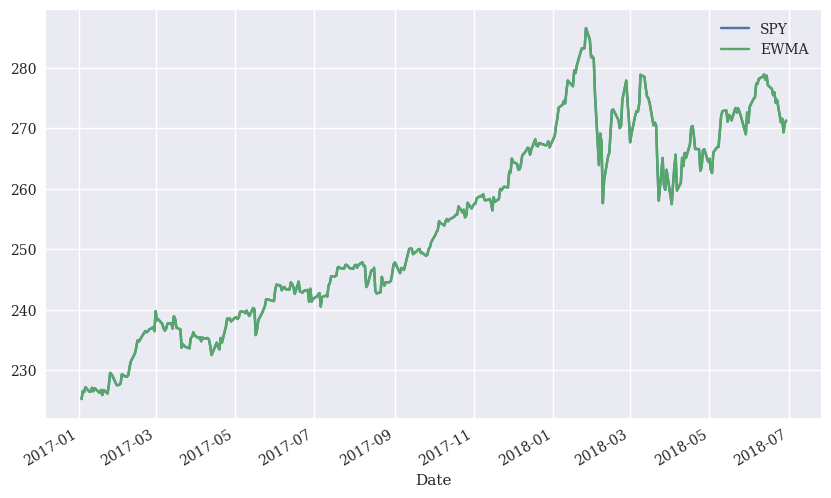

In [149]:
data[data.index>'2017-1-1'].plot(figsize=(10,6));

##### より一般的なPython関数ewma_py()を定義します。ndarrayオブジェクトの列、すなわち生の金融時系列データを直接扱います。

In [150]:
def ewma_py(x, alpha): 
    y = np.zeros_like(x) 
    y[0] = x[0] 
    for i in range(1, len(x)): 
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
        return y

In [151]:
#関数をSeriesオブジェクト(すなわち列)に直接適用
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)

CPU times: total: 0 ns
Wall time: 2 ms


In [152]:
#関数を生データを含むndarrayオブジェクトに適用
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)

CPU times: total: 0 ns
Wall time: 0 ns


##### この方式で既にコードの実行速度は20から100倍以上とかなり向上しています。

#### 10.5.2 Numba

##### このアルゴリズム構造はNumbaによるさらなる速度向上が可能です。関数ewma_nb()をndarray版のデータに適用すると、さらに1桁速度向上します。

In [153]:
ewma_nb = numba.jit(ewma_py)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\4223408033.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  ewma_nb = numba.jit(ewma_py)


In [154]:
#関数をSeriesオブジェクト(すなわち列)に直接適用
%time data['EWMA_NB'] = ewma_nb(data[sym], alpha)

CPU times: total: 31.2 ms
Wall time: 222 ms


C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2761220044.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "ewma_py" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Users\iikkdn\AppData\Local\Temp\ipykernel_9856\2761220044.py (1)

File "..\..\..\AppData\Local\Temp\ipykernel_9856\2761220044.py", line 1:
<source missing, REPL/exec in use?>

  def ewma_py(x, alpha):
c:\Users\iikkdn\anaconda3\Lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "ewma_py" was compiled in object mode without forceobj=True.

File "..\..\..\AppData\Local\Temp\ipykernel_9856\2761220044.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
c:\Users\iikkdn\anaconda3\Lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected. Th

In [155]:
#関数をSeriesオブジェクト(すなわち列)に直接適用
%timeit data['EWMA_NB'] = ewma_nb(data[sym], alpha)

212 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [157]:
#関数を生データを含むndarrayオブジェクトに適用
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)

CPU times: total: 93.8 ms
Wall time: 326 ms


In [158]:
#関数を生データを含むndarrayオブジェクトに適用
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)

72.9 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### 10.5.3 Cython

##### ewma_cy()をCythonで実装するとかなり速度が向上しますが、Numbaほどではありません。

In [159]:
%%cython 
import numpy as np 
cimport cython 
@cython.boundscheck(False) 
@cython.wraparound(False) 
def ewma_cy(double[:] x, float alpha): 
    cdef inti 
    cdef double[:] y = np.empty_like(x) 
    y[0] = x[0] 
    for i in range(1, len(x)): 
        y[i] =alpha* x[i] + (1 -alpha)* y[i -1] 
        return y

UsageError: Cell magic `%%cython` not found.


In [160]:
%time data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

NameError: name 'ewma_cy' is not defined

In [162]:
%timeit data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

NameError: name 'ewma_cy' is not defined

##### この最後の例は一般に（非標準）アルゴリズムの実装に複数の選択肢があることを示しています。すべてのオプションが同じ結果になることもあれば、性能がかなり異なることもあります。この例の実行時間は0.1ミリ秒から500ミリ秒と、5,000倍の開きがあります。


### 10.6 結論

##### Pythonエコシステムにはコードの性能改善にいくつもの方法が用意されています。

#### イディオム／パラダイム
##### Pythonイデイオム／パラダイムは具体的な問題を他より効率的に処理できる。例えばベクトル化を使うとより簡潔でより高速なコードとなるパラダイム（しかしときには、大きなメモリというコストを伴う）。

#### バッケージ
##### さまざまな問題の種類に応じて多数のパッケージがある。問題に適したパッケージを使うと大きな性能向上に繋がる。ndarrayクラスのNumPyやDataFrameクラスのpandasが好例。

#### コンバイル
##### 金融アルゴリズムの速度向上にはPythonコードの動的／静的コンパイルを行う強力なパッケージNumbaとCythonを使う。

#### 並列化
##### multiprocessingのようなパッケージを使うとコードを簡単に並列化できる。本章の例は単ーマシン並列化のみで行っただけだが、Pythonエコシステムは複数マシン（クラスタ）並列化テクノロジーも提供する。

##### 本章で述べだ性能向上手法の主な利点は、一般に簡単に実装可能な、つまり追加作業が通常少ないことです。言い換えると、性能向上が今日の性能関連のパッケージのおかげで、誰にも手が届くようになったのです。

### 10.7 さらに学ぶために

##### 本章で述べたすべての性能関連のパッケージについて詳しくは次のオンラインリソースを参照してください。

##### •Cythonパッケージ／コンパイラプロジェクトのホームページhttps://cython.org 
##### •multiprocessingモジュールの公式ドキュメントhttps://docs. python.org/ja/3/library/multiprocessing.html
##### •Numbaの情報https://github.com/numba/numbaとhttps://numba.pydata.org

##### 参考書は次の通りです。

##### • Gorelick, Misha, and Ian Ozsvald (2015). High Performance Python.（邦題『ハイパフォーマンスPython』相川愛三訳、オライリー・ジャパン）
##### • Smith, Kurt(2015). Cython.（邦題『Cython-Cとの融合によるPythonの高速化』中田秀基監訳、長尾高弘訳、オライリー・ジャパン）